In this file we will be exploring methods for improving the quality of the cloud mask results.

In particular, we will be looking at:

- Dilation to remove the effect of the boundary conditions
- Erosion to remove the effect of small noise - possibly not needed
- Closing to remove small holes in the output
- Opening to remove the effects of small noise - possibly

In [2]:
import numpy as np
import cv2 as cv
import numpy as np
from pathlib import Path
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as colors


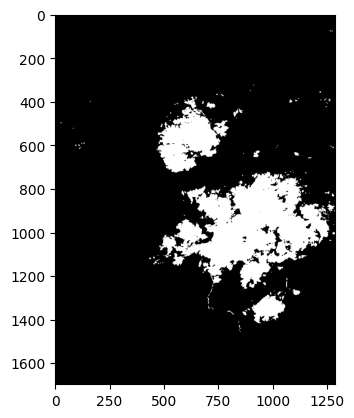

In [4]:
base_path = Path("/home/ebiederstadt/Documents/sentinel_cache/bbox-111.9314176_56.921209032_-111.6817217_57.105787570/2019-05-22/testing_cloud_detection")

new_mask = rasterio.open(base_path.joinpath("new_mask.tif")).read(1)

plt.imshow(new_mask, cmap=plt.cm.gray)

rgb = rasterio.open(base_path.parent.joinpath("RGB.tif")).read()
rgb_image = np.transpose(rgb, (1, 2, 0))

norm = colors.Normalize(vmin=rgb_image.min(), vmax=rgb_image.max())
rgb_image = norm(rgb_image)

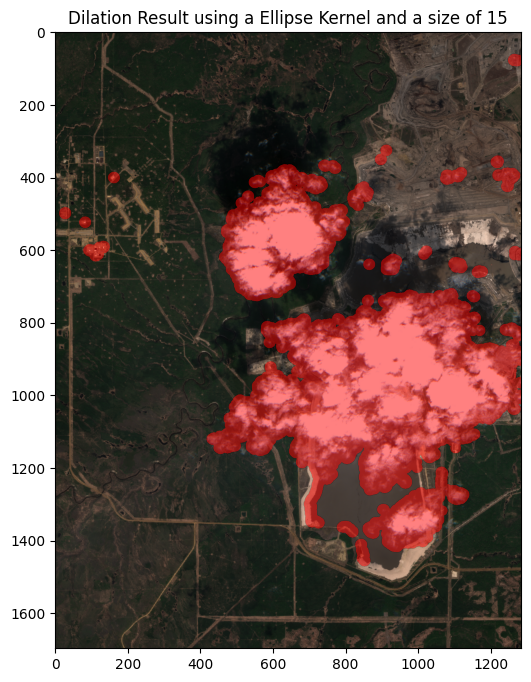

In [44]:
dilation_size = 15
dilation_shape = cv.MORPH_ELLIPSE
element = cv.getStructuringElement(dilation_shape, (2 * dilation_size + 1, 2 * dilation_size + 1))

dilatation_dst = cv.dilate(new_mask, element)

plt.figure(figsize=(10, 8))

mask_image = np.zeros((*dilatation_dst.shape, 4))
mask_image[..., 0] = dilatation_dst
mask_image[..., 3] = dilatation_dst * 0.5
plt.imshow(rgb_image)
plt.imshow(mask_image)
plt.title(f"Dilation Result using a Ellipse Kernel and a size of {dilation_size}")

plt.savefig("comparing_dilation.png", dpi=300, bbox_inches="tight")

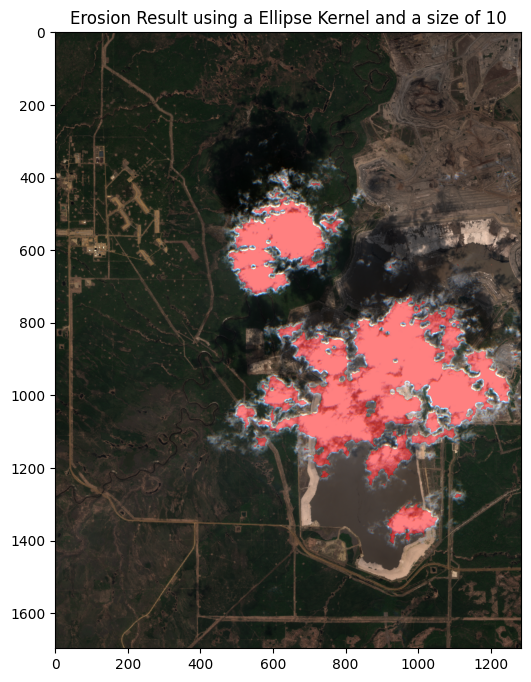

In [40]:
# Erosion

erosion_size = 5
erosion_shape = cv.MORPH_ELLIPSE
element = cv.getStructuringElement(erosion_shape, (2 * erosion_size + 1, 2 * erosion_size + 1))

erosion_dst = cv.erode(new_mask, element)

plt.figure(figsize=(10, 8))

mask_image = np.zeros((*erosion_dst.shape, 4))
mask_image[..., 0] = erosion_dst
mask_image[..., 3] = erosion_dst * 0.5
plt.imshow(rgb_image)
plt.imshow(mask_image)
plt.title(f"Erosion Result using a Ellipse Kernel and a size of {dilation_size}")

plt.savefig("comparing_erosion.png", dpi=300, bbox_inches="tight")

# Closing to remove small holes in the detected cloud mask

dst = cv.morphologyEx()